In [102]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [103]:
path  = '/home/lee/Desktop/Sales_Reporting/data'

# Task 2: Clean and Preprocess data

## Task 2.1: Merge 12-month data

In [104]:
# Create a list contains all data frame (file csv month 1 to 12)
list_all_data_frame = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path +'/'+ file
        dataframe_1month = pd.read_csv(filepath)
        # Add data frame 1 month to list all data frame
        list_all_data_frame.append(dataframe_1month)
        # Merge all data frame in list
        mergered_df = pd.concat(list_all_data_frame)
        
        length_1month = len(dataframe_1month.index)
        all_length.append(length_1month)

In [105]:
# Check len data frame, in order not to miss data
if len(mergered_df) == sum(all_length):
    print('Not missing data')
else:
    print('Missing data')

Not missing data


In [106]:
# Create csv file name 'annualSales2019.csv', remove index 
mergered_df.to_csv('annualSales2019.csv',index =False)

## Task 2.2: Add 'Month' column

In [107]:
df  = mergered_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [108]:
# str[0:2] is the first and second char in 'Order Date'
df['Month']= df['Order Date'].str[0:2]
df['Month'].unique()

array(['11', nan, '12', 'Or', '08', '09', '01', '02', '03', '05', '06',
       '07', '10', '04'], dtype=object)

## Task 2.3: Get rid of 'nan' and 'or' value

In [109]:
# Get rid of 'nan'
df= df.dropna(how='all')
# Get rid of 'or'
df = df[df.Month!='Or']
print('Drop',len(mergered_df) - len(df), "'nan' and 'or'  values")

Drop 900 'nan' and 'or'  values


In [110]:
# Convert dataframe string to interger type
df.Month = pd.to_numeric(df.Month)

# Task 3: Reporting

## Task 3.1: What was the best month for sales? How much was earned that month?

In [111]:
# Check Quantity Ordered type
df['Quantity Ordered'].describe()

count     185950
unique         9
top            1
freq      168552
Name: Quantity Ordered, dtype: object

In [112]:
# Check Price Each type
df['Price Each'].describe()

count     185950
unique        23
top        11.95
freq       21903
Name: Price Each, dtype: object

In [113]:
# Convert Quantity Ordered & Price Each column datatype from string to interger
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [114]:
# Sales = Quantity Ordered * Price Each
df_sales = df['Quantity Ordered'] * df['Price Each']
df_sales.head()

0     11.99
1     23.90
2    150.00
3    149.99
4     99.99
dtype: float64

In [115]:
# Insert column at index 4 with name 'Sales'
sales_index_column = 4
df.insert(sales_index_column,'Sales',df_sales)

In [116]:
def draw_bar_chart(x_axis,y_axis,x_name= None, y_name = None):
    plt.bar(x = x_axis, height = y_axis, color = 'blue')
    plt.xticks(x_axis,rotation = 90)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

In [117]:
def draw_pie(data,labels, name = None):
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:10]
    #create pie chart
    plt.pie(
        data, labels = labels, 
        colors = colors, autopct='%1.2f%%', 
        radius= 1.5)
        
    # x_axis_legend = -0,5
    # y_axis_legend = 0.2
    plt.legend(
        loc="lower right", 
        bbox_to_anchor=(-0.5, 0.2))

    plt.title(
        label = name, 
        # fontstyle ='oblique' ,
        fontsize = 20,
        loc="center",
        pad = '50')
    
    plt.show()

In [118]:
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,23.90,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.00,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11
...,...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",3
15222,176555,27in FHD Monitor,1,149.99,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",3
15223,176556,AAA Batteries (4-pack),3,2.99,8.97,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",3
15224,176557,iPhone,1,700.00,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",3


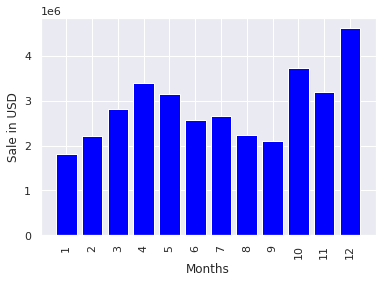

In [119]:
# Group and calculate sum sales each month
sales_value_month = df.groupby('Month').sum()['Sales']
months = sales_value_month.index
draw_bar_chart(months,sales_value_month,'Months','Sale in USD')

In [120]:
def getMonth(month):
    if month > 12:
        return 
    list_of_month = ['January','February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'Octorber', 'November', 'December']
    return list_of_month[month-1]

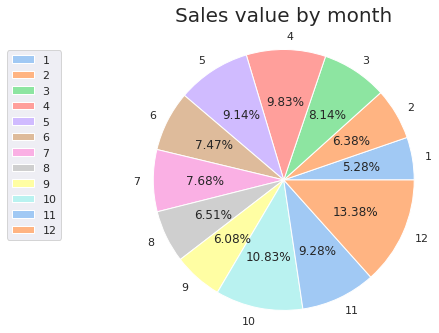

In [121]:
data = sales_value_month
labels = sales_value_month.index
name_chart = 'Sales value by month'
draw_pie(data, labels, name_chart)

In [122]:
month_percent = (sales_value_month/sales_value_month.sum()) *100
max_percent_month =month_percent.max()

In [123]:
best_month_for_sale = getMonth(sales_value_month.idxmax())
print('The best month for sales is',best_month_for_sale, end='.\n')
print(sales_value_month.max(),'was earned that month.')
print(best_month_for_sale,'accounts for around', round(max_percent_month,2), "% of total sales in a year.")

The best month for sales is December.
4613443.34000153 was earned that month.
December accounts for around 13.38 % of total sales in a year.


## Task 3.2: What city has the best sales?

In [124]:
# Slice string pandas by condition
# Realize the city before the first ', '
city_index = 1
address_to_city = df['Purchase Address'].str.split(', ', expand =True)[city_index]
df['City'] = address_to_city
df['City']

0        New York City
1               Austin
2          Los Angeles
3              Seattle
4               Boston
             ...      
15221    San Francisco
15222    San Francisco
15223      Los Angeles
15224    San Francisco
15225    San Francisco
Name: City, Length: 185950, dtype: object

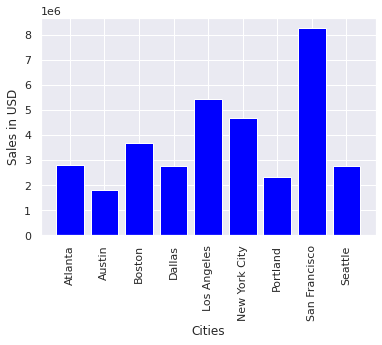

In [125]:
sales_value_city = df.groupby('City').sum()['Sales']
cities = sales_value_city.index
draw_bar_chart(cities,sales_value_city,'Cities','Sales in USD')

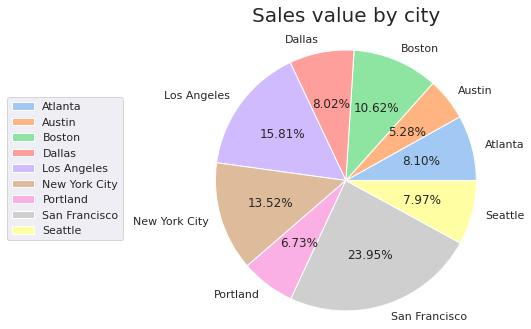

In [126]:
data = sales_value_city
labels = sales_value_city.index
name_chart = 'Sales value by city'
draw_pie(data, labels, name_chart)

In [127]:
print(sales_value_city.idxmax(),"has the best sales.")

San Francisco has the best sales.


## Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product?

In [128]:
hour_index = 1
# Split datetime from Order Date
datetime_to_time = df['Order Date'].str.split(' ',expand = True)[hour_index]
# Split hour from datetime
df['Hours'] =datetime_to_time.str[0:2]
df['Hours']

0        09
1        10
2        14
3        22
4        13
         ..
15221    11
15222    20
15223    10
15224    12
15225    12
Name: Hours, Length: 185950, dtype: object

In [129]:
# Convert Hours column datatype to interger
df['Hours'] = pd.to_numeric(df['Hours'])

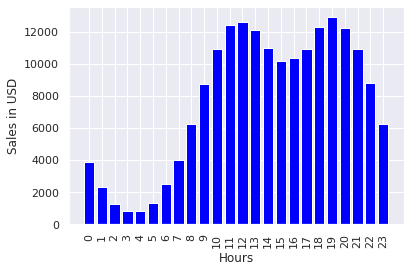

In [130]:
# Note in this question you need to figure out what time have much order not total sales
# So use count func instead of sum func here
sales_value_hour = df.groupby('Hours').count()['Sales']
hours  = sales_value_hour.index
draw_bar_chart(hours,sales_value_hour,'Hours','Sales in USD')

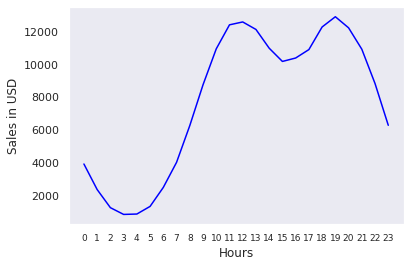

In [131]:
hours  = sales_value_hour.index
# Plot chart
plt.plot(hours, sales_value_hour,color = 'blue')
plt.grid()
plt.xticks(hours, size = 9)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()
# time

## Task 3.4: What products are most often sold together?

In [132]:
# How to find duplicates in pandas
df_dup = df[df['Order ID'].duplicated(keep=False)]

In [133]:
df_dup['All Products']= df_dup.groupby('Order ID')['Product'].apply(','.join)
# The All Products only return NaN because apply() return Dataframe but column need series
df_dup.head()

<ipython-input-133-931a512f16d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products']= df_dup.groupby('Order ID')['Product'].apply(','.join)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
9,278806,Bose SoundSport Headphones,1,99.99,99.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,Boston,19,NaN
10,278806,ThinkPad Laptop,1,999.99,999.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,Boston,19,NaN
15,278811,Wired Headphones,1,11.99,11.99,11/06/19 16:01,"99 Elm St, San Francisco, CA 94016",11,San Francisco,16,NaN
16,278811,Apple Airpods Headphones,1,150.00,150.00,11/06/19 16:01,"99 Elm St, San Francisco, CA 94016",11,San Francisco,16,NaN
24,278819,iPhone,1,700.00,700.00,11/04/19 06:20,"880 Maple St, New York City, NY 10001",11,New York City,6,NaN


In [134]:
# How to combine multiple row in one rowpandas

# Create a function for transform function in order to join values together
groupProduct = lambda product:  ', '.join(product)
# Use transform instead of apply
# transform() need function
df_dup['All Products']= df_dup.groupby('Order ID')['Product'].transform(groupProduct)


<ipython-input-134-dc7c84f3fd3b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products']= df_dup.groupby('Order ID')['Product'].transform(groupProduct)


In [135]:
# How to count number of values in column pandas
df_dup['All Products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        1764
Google Phone, USB-C Charging Cable                      1712
iPhone, Wired Headphones                                 722
Vareebadd Phone, USB-C Charging Cable                    624
Google Phone, Wired Headphones                           606
iPhone, Apple Airpods Headphones                         572
Google Phone, Bose SoundSport Headphones                 322
Google Phone, USB-C Charging Cable, Wired Headphones     231
Vareebadd Phone, Wired Headphones                        208
iPhone, Lightning Charging Cable, Wired Headphones       168
Name: All Products, dtype: int64

## Task 3.5: What product sold the most? Why do you think it sold the most?

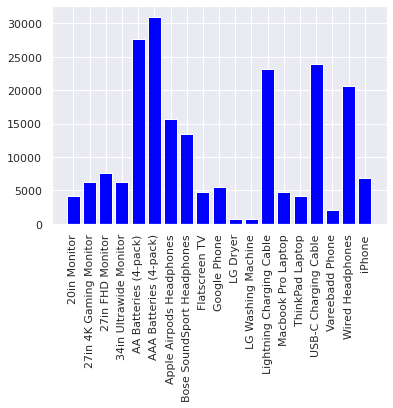

In [136]:
quantity= df.groupby('Product').sum()['Quantity Ordered']
product_list =quantity.index 
draw_bar_chart(product_list,quantity)

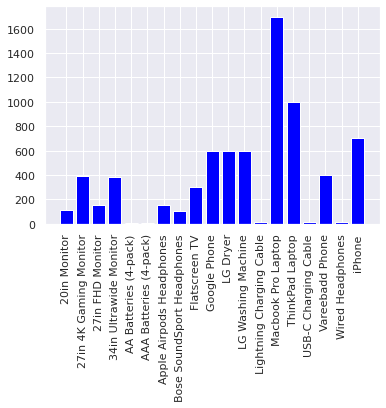

In [137]:
# Get price product
prices = df.groupby('Product').mean()['Price Each']
draw_bar_chart(product_list,prices)

In [138]:
print(quantity.idxmax(),'sold the most')

AAA Batteries (4-pack) sold the most
